#### 首先，在终端安装一下 itchat 包。

##### pip install itchat

安装完成后导入包，再登陆自己的微信。过程中会生产一个登陆二维码，扫码之后即可登陆。登陆成功后，把自己好友的相关信息爬下来。

## 1、登录微信获取微信中的json信息

In [3]:
import itchat
itchat.login()
# 爬取自己好友的相关信息，返回一个json文件
friends = itchat.get_friends(update = True)[0:]

itchat has already logged in.


上述代码运行后会生成一个二维码，使用微信扫描确认登录微信网页版

有了上面的 friends 数据，我们就可以来做分析啦。

## 2、自己微信好友的男女比例

In [32]:
# 初始化计数器
male = female = other = 0
# friends[0]是自己的信息，所以应该从friends[1]开始
for person in friends[1:]:
    sex = person["Sex"]
    if sex == 1:
        male += 1
    elif sex == 2:
        female += 1
    else:
        other += 1
# 计算朋友的总数
total = len(friends[1:])
# 打印出自己的好友性别比例
malecol=round(float(male)/total*100,2)
femalecol=round(float(female)/total*100,2)
othercol=round(float(other)/total*100,2)
print("您共有%d个好友"%(total))
print('男性朋友：%.2f%%' %(malecol)+'\n'+'女性朋友:%.2f%%' % (femalecol)+'\n'+'性别不明的好友：%.2f%%' %(othercol))

您共有198个好友
男性朋友：60.10%
女性朋友:32.83%
性别不明的好友：7.07%


啊，看看这个结果，我是老惨了...

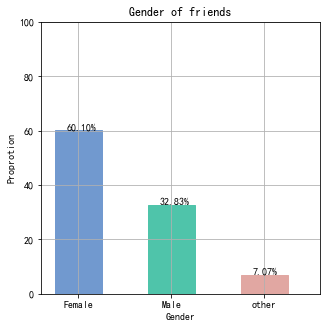

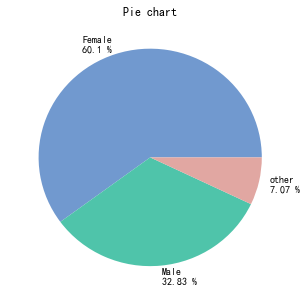

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# #解决中文乱码不显示问题
# mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体 
# mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题 
map = {
 'Female': (malecol, '#7199cf'),
 'Male': (femalecol, '#4fc4aa'),
 'other': (othercol, '#e1a7a2')
}
 
fig = plt.figure(figsize=(5,5))# 整体图的大小
ax = fig.add_subplot(111)#添加一个子图
ax.set_title('Gender of friends')
 
xticks = np.arange(3)+0.15# 生成x轴每个元素的位置
bar_width = 0.5# 定义柱状图每个柱的宽度
names = map.keys()#获得x轴的值
values = [x[0] for x in map.values()]# y轴的值
colors = [x[1] for x in map.values()]# 对应颜色
 
bars = ax.bar(xticks, values, width=bar_width, edgecolor='none')# 画柱状图，横轴是x的位置，纵轴是y，定义柱的宽度，同时设置柱的边缘为透明
ax.set_ylabel('Proprotion')# 设置标题
ax.set_xlabel('Gender')
ax.grid()#打开网格
ax.set_xticks(xticks)# x轴每个标签的具体位置
ax.set_xticklabels(names)# 设置每个标签的名字
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])# 设置x轴的范围
ax.set_ylim([0, 100])# 设置y轴的范围
for bar, color in zip(bars, colors):
    bar.set_color(color)# 给每个bar分配指定的颜色
    height=bar.get_height()#获得高度并且让字居上一点
    plt.text(bar.get_x()+bar.get_width()/4.,height,'%.2f%%' %float(height))#写值
plt.show()
#画饼状图
fig1 = plt.figure(figsize=(5,5))# 整体图的标题
ax = fig1.add_subplot(111)
ax.set_title('Pie chart')
labels = ['{}\n{} %'.format(name, value) for name, value in zip(names, values)]
ax.pie(values, labels=labels, colors=colors)#并指定标签和对应颜色
plt.show()

## 3、省份分类并根据个数对其排序

In [28]:
#用来爬取各个变量
def get_var(var):
    variable=[]
    for i in friends:
        value=i[var]
        variable.append(value)
    return variable
 
#调用函数得到各个变量，并把数据存到csv文件中，保存到桌面
NickName=get_var('NickName')
Sex=get_var('Sex')
Province=get_var('Province')
City=get_var('City')
Signature=get_var('Signature')
 
pros=set(Province)#去重
prosarray=[]
for item in pros:
    prosarray.append((item,Province.count(item)))#获取个数
def by_num(p):
    return p[1]
prosdsored=sorted(prosarray,key=by_num,reverse=True)#根据个数排序

## 画省份图：

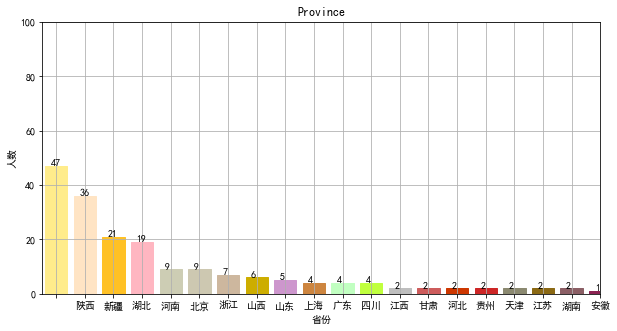

In [31]:
#画图
figpro = plt.figure(figsize=(10,5))# 整体图的标题
axpro = figpro.add_subplot(111)#添加一个子图
axpro.set_title('Province')
xticks = np.linspace(0.5,20,20)# 生成x轴每个元素的位置
bar_width = 0.8# 定义柱状图每个柱的宽度
pros=[]
values = []
count=0
for item in prosdsored:
    pros.append(item[0])
    values.append(item[1])
    count=count+1
    if count>=20:
        break
 
colors = ['#FFEC8B','#FFE4C4','#FFC125','#FFB6C1','#CDCDB4','#CDC8B1','#CDB79E','#CDAD00','#CD96CD','#CD853F','#C1FFC1','#C0FF3E','#BEBEBE','#CD5C5C','#CD3700','#CD2626','#8B8970','#8B6914','#8B5F65','#8B2252']# 对应颜色
 
bars = axpro.bar(xticks, values, width=bar_width, edgecolor='none')
axpro.set_ylabel('人数')# 设置标题
axpro.set_xlabel('省份')
axpro.grid()#打开网格
axpro.set_xticks(xticks)# x轴每个标签的具体位置
axpro.set_xticklabels(pros)# 设置每个标签的名字
axpro.set_xlim(0,20)# 设置x轴的范围
axpro.set_ylim([0, 100])# 设置y轴的范围
 
for bar, color in zip(bars, colors):
    bar.set_color(color)# 给每个bar分配指定的颜色
    height=bar.get_height()#获得高度并且让字居上一点
    plt.text(bar.get_x()+bar.get_width()/4.,height,'%.d' %float(height))#写值
 
plt.show()